# Black Friday Analysis
### Based on a retail stores data set on the sales from 2017

In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#### Importing the data on a csv file. 

In [63]:
df1 = pd.read_csv(r"BlackFriday.csv")

Columns of the data set include -: 
##### 1) User ID 
##### 2) Product ID
##### 3) Gender
##### 4) Age
##### 5) Occupation -> 20 different occupations have been categorised numerically between 1-20.
##### 6) Category of City -> Cities are classified as tier A,B and C. 
##### 7) Number of years in a city -> Classified as 1,2,3, and 4+ years in a city.
##### 8) Marital Status -> 0 is unmarried and 1 is married. 
##### 9) Product Category -> There are 3 different type of product categories in 3 different columns and the specific product in the product type picked up in each category is given. 
##### 10) Purchase -> The amount spent by the customer is given under purchase. 

In [5]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Replacing na/nan values in the data frame with 0.

In [6]:
df1 = df1.fillna(0)

#### Replacing 4+ years in the Stay_In_Current_City_Years column with a 4 because it is a string and an ML model requires integers to draw conclusion. Simillar technique is used in case of other columns to replace string instances with numeric data. Categories are replaced with 0,1,2... 

In [7]:
new_df = df1.Stay_In_Current_City_Years.replace(['4+'],4)
new_df.head(10)

0    2
1    2
2    2
3    2
4    4
5    3
6    2
7    2
8    2
9    1
Name: Stay_In_Current_City_Years, dtype: object

In [8]:
df1['new_stay'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1


In [9]:
new_df = df1.Age.replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[0,1,2,3,4,5,6])
new_df.head(10)

0    0
1    0
2    0
3    0
4    6
5    2
6    4
7    4
8    4
9    2
Name: Age, dtype: int64

In [10]:
df1['new_age'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay,new_age
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4,6
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3,2
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2,4
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2,4
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2,4
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1,2


In [11]:
new_df = df1.City_Category.replace(['A','B','C'],[0,1,2])
new_df.head(10)

0    0
1    0
2    0
3    0
4    2
5    0
6    1
7    1
8    1
9    0
Name: City_Category, dtype: int64

In [12]:
df1['new_city'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay,new_age,new_city
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4,6,2
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3,2,0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2,4,1
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2,4,1
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2,4,1
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1,2,0


In [13]:
new_df = df1.Gender.replace(['M','F'],[0,1])
new_df.head(10)

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Gender, dtype: int64

In [14]:
df1['new_gender'] = new_df
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_stay,new_age,new_city,new_gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,2,0,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2,0,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,2,0,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2,0,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,4,6,2,0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227,3,2,0,0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,2,4,1,0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854,2,4,1,0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686,2,4,1,0
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871,1,2,0,0


## Data cleaning has been performed and a new table has been generated. Moving to visualisation.

### Split up of age,gender,city based on population

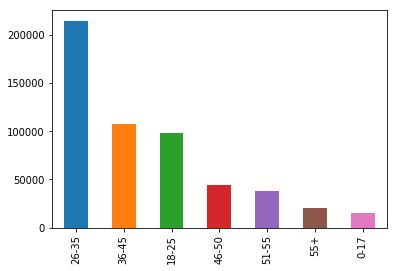

In [15]:
AgeGroup = df1['Age'].map(lambda n: n.split("|")[0].split(":")[0]).value_counts().head(20)
AgeGroup.plot.bar()

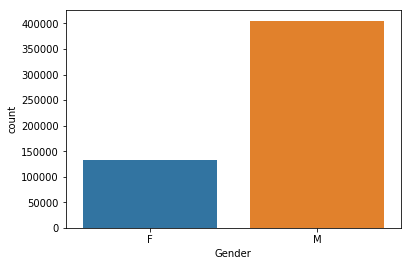

In [16]:
sns.countplot(df1['Gender'])

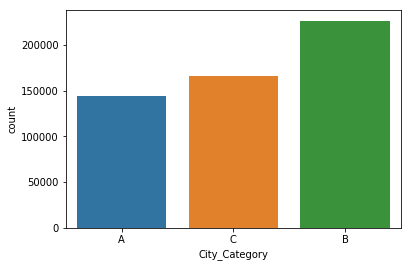

In [17]:
sns.countplot(df1['City_Category'])

### Split up based on (Age,Occupation) and Gender of the customers.

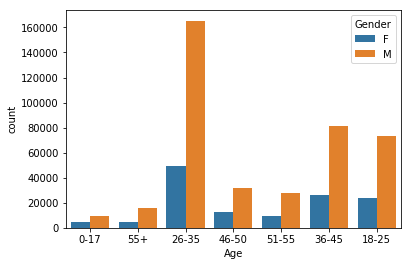

In [18]:
sns.countplot(df1['Age'],hue=df1['Gender'])

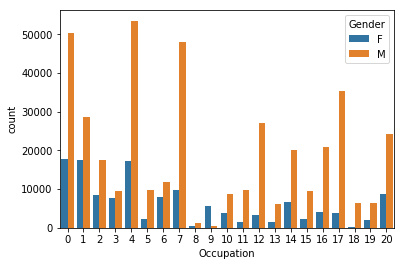

In [19]:
sns.countplot(df1['Occupation'],hue=df1['Gender'])

In [20]:
print(df1['Gender'].value_counts())

M    405380
F    132197
Name: Gender, dtype: int64


In [21]:
df1_Male = df1.loc[df1['Gender'] == 'M']
df1_Female = df1.loc[df1['Gender'] == 'F']

In [22]:
total_spending_male = df1_Male['Purchase'].sum()
total_spending_male

3853044357

In [23]:
total_spending_female = df1_Female['Purchase'].sum()
total_spending_female

1164624021

### Total Spent by Males and Females

In [24]:
spending_data = [['M',total_spending_male],['F',total_spending_female]]
df2 = pd.DataFrame(spending_data, columns=('Gender','Purchase'))
df2

,Gender,Purchase
0,M,3853044357
1,F,1164624021


In [25]:
df1_A = df1.loc[df1['City_Category'] == 'A']
df1_B = df1.loc[df1['City_Category'] == 'B']
df1_C = df1.loc[df1['City_Category'] == 'C']

In [26]:
total_spending_A = df1_A['Purchase'].sum()
total_spending_A

1295668797

In [27]:
total_spending_B = df1_B['Purchase'].sum()
total_spending_B

2083431612

In [28]:
total_spending_C = df1_C['Purchase'].sum()
total_spending_C

1638567969

In [29]:
### Total Spent by each city category.

In [30]:
spending_data_City = [['A',total_spending_A],['B',total_spending_B],['C',total_spending_C]]
df3 = pd.DataFrame(spending_data_City, columns=('City_Category','Purchase'))
df3

,City_Category,Purchase
0,A,1295668797
1,B,2083431612
2,C,1638567969


In [31]:
df1['combined_G_M'] = df1.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df1['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


### Number of males and females who are married and unmarried in each age group.

In [32]:
df5 = df1.groupby(['combined_G_M','Age']).size()
df5

combined_G_M  Age  
F_0           0-17       4953
              18-25     17940
              26-35     29389
              36-45     16305
              46-50      3059
              51-55      3484
              55+        1844
F_1           18-25      6117
              26-35     19959
              36-45     10115
              46-50      9797
              51-55      6150
              55+        3085
M_0           0-17       9754
              18-25     59053
              26-35    101135
              36-45     48687
              46-50      9273
              51-55      7155
              55+        5786
M_1           18-25     14524
              26-35     64207
              36-45     32392
              46-50     22397
              51-55     20829
              55+       10188
dtype: int64

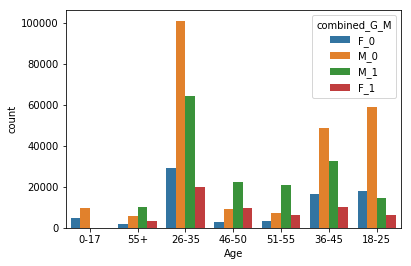

In [33]:
sns.countplot(df1['Age'],hue=df1['combined_G_M'])

### Box plot comparing purchase of various age groups

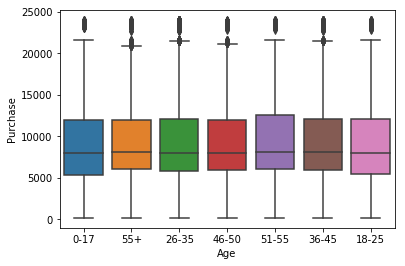

In [34]:
sns.boxplot('Age','Purchase', data = df1)
plt.show()

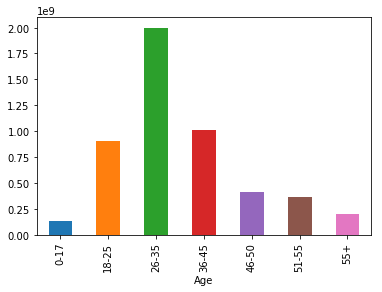

In [35]:
Age_buy = df1.groupby(["Age"])["Purchase"].sum()
Age_buy.plot.bar()

### Bar chart plotting amount spent in each product category by various age groups

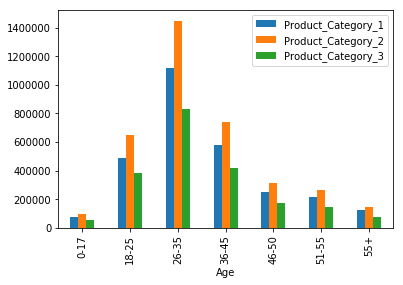

In [36]:
product_age = df1.groupby(["Age"])["Product_Category_1", "Product_Category_2", "Product_Category_3"].sum()
product_age.plot.bar()


### Determing the statistics of the purchase by the customers. Thus determinding what makes a good and a bad customer.

In [37]:
df1.Purchase.describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

### PLotting a scatter plot to see any pattern in the purchase to be able to draw a regression line. 

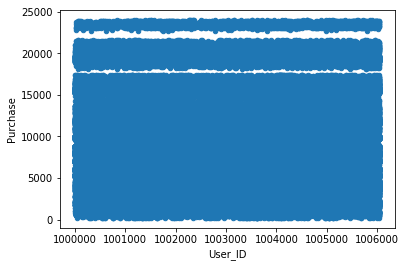

In [39]:
df1.plot.scatter(x = "User_ID",y="Purchase")

### We have taken any purchase over that of 12073 to be that of a good customer. 12073 is the 75 percentile mark based on our data description. 

#### Getting the purchase in a binary form based on whether a customer is a good one or not a good one. 1 implies it is a good customer. 0 implies it is not a good customer. 

In [40]:
clean_data = df1.copy()
clean_data['good_customer'] = (clean_data['Purchase'] > 12073)*1
print(clean_data['good_customer'])

0         0
1         1
2         0
3         0
4         0
5         1
6         1
7         1
8         1
9         0
10        0
11        0
12        0
13        1
14        0
15        0
16        1
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        1
26        0
27        0
28        0
29        1
         ..
537547    0
537548    1
537549    1
537550    0
537551    0
537552    1
537553    1
537554    0
537555    0
537556    0
537557    1
537558    0
537559    0
537560    0
537561    0
537562    0
537563    0
537564    0
537565    0
537566    0
537567    0
537568    0
537569    0
537570    1
537571    0
537572    0
537573    1
537574    0
537575    0
537576    0
Name: good_customer, Length: 537577, dtype: int64


In [41]:
y=clean_data[['good_customer']].copy()

In [42]:
y.head()

,good_customer
0,0
1,1
2,0
3,0
4,0


In [43]:
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'new_stay',
       'new_age', 'new_city', 'new_gender', 'combined_G_M'],
      dtype='object')

In [44]:
customer_features = ['new_age', 'Occupation', 'new_city',
       'new_stay', 'Marital_Status','new_gender', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

#### Building an X and Y dataframe to perform a decision tree analysis.

In [45]:
X = clean_data[customer_features].copy()

In [46]:
X.head()

,new_age,Occupation,new_city,new_stay,Marital_Status,new_gender,Product_Category_1,Product_Category_2,Product_Category_3
0,0,10,0,2,0,1,3,0.0,0.0
1,0,10,0,2,0,1,1,6.0,14.0
2,0,10,0,2,0,1,12,0.0,0.0
3,0,10,0,2,0,1,12,14.0,0.0
4,6,16,2,4,0,0,8,0.0,0.0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [48]:
good_customer_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
good_customer_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [49]:
predictions = good_customer_classifier.predict(X_test)

#### Predictions for the first 10 customers.

In [50]:
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Comparison with actual results

In [51]:
y_test['good_customer'][:10]

11096     0
81136     0
111982    0
304352    0
330642    0
70811     0
181976    0
46477     0
344564    0
437618    0
Name: good_customer, dtype: int64

### Accuracy % of our decision tree model

In [52]:
accuracy = accuracy_score(y_true = y_test, y_pred = predictions)
print(accuracy * 100)

84.38565735255156


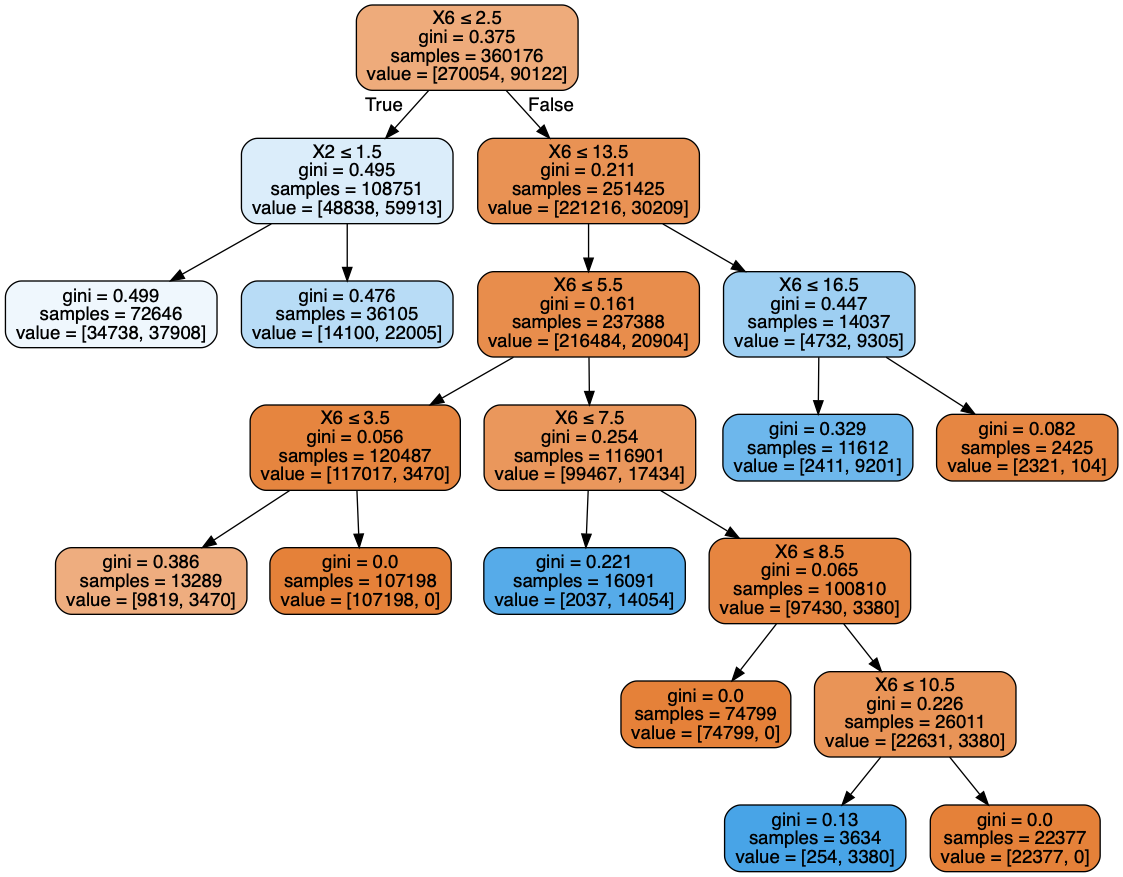

In [57]:
dot_data = StringIO()
export_graphviz(good_customer_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [62]:
X.head()

,new_age,Occupation,new_city,new_stay,Marital_Status,new_gender,Product_Category_1,Product_Category_2,Product_Category_3
0,0,10,0,2,0,1,3,0.0,0.0
1,0,10,0,2,0,1,1,6.0,14.0
2,0,10,0,2,0,1,12,0.0,0.0
3,0,10,0,2,0,1,12,14.0,0.0
4,6,16,2,4,0,0,8,0.0,0.0
